In [26]:
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [27]:
from rdkit import Chem
from rdkit.Chem import Mol
from rdkit.Chem import inchi
from rdkit.Chem import Draw, rdDepictor
from IPython.display import display

def is_same_mol(mol1: Mol, mol2: Mol, options=None):
    inchi1 = inchi.MolToInchiKey(mol1, options)
    inchi2 = inchi.MolToInchiKey(mol2, options)
    return inchi1 == inchi2

def print_atoms_and_labels(mol: Mol):
    for a in mol.GetAtoms():
        text = a.GetSymbol() + ", MapNum: " + str(a.GetAtomMapNum())
        if a.HasProp('atomLabel'):
            text += ", label: " + a.GetProp("atomLabel")
        print(text)

def draw_mol(mol: Mol, width, height, all_prop=False):
    if all_prop:
        for a in mol.GetAtoms():
            if a.HasProp("atomLabel"):
                label = a.GetProp("atomLabel")
                label += "_" + a.GetProp("polymerName")
                label += "_" + a.GetProp("monomerIndex")
                a.SetProp("atomLabel", label)

    rdDepictor.SetPreferCoordGen(True)
    rdDepictor.Compute2DCoords(mol, clearConfs=True)
    display(Draw.MolToImage(mol, size = (width, height)))

In [71]:
%load_ext autoreload
%autoreload 2
from utils import MonomersLib, HELMConverter

monomers_lib_path = molgen_path + "data/helm/library/chembl_35_monomer_library_edited.xml"
lib = MonomersLib()
lib.load_lib(monomers_lib_path)
converter = HELMConverter(lib)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[14:53:24] WARNING: not removing hydrogen atom with dummy atom neighbors
[14:53:24] WARNING: not removing hydrogen atom with dummy atom neighbors


PEPTIDE3 PEPTIDE2 False
PEPTIDE1 PEPTIDE2 False
PEPTIDE1 PEPTIDE3 True


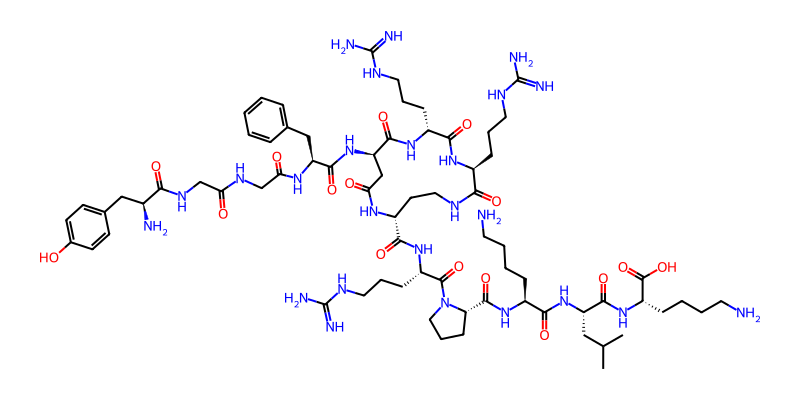

In [72]:
# helm = "PEPTIDE1{K.F.Y.C.N.G.K.R.V.C.V.C.R.[am]}$$$$"
# helm = "PEPTIDE1{[ac].Y.[dC].[dD].[dP].[dC]}$PEPTIDE1,PEPTIDE1,6:R3-3:R3$$$"
# helm = "PEPTIDE1{[dC].[dS].N.[dL].S.[dalloT].[dC].V.L.S.A.Y.W.R.N.L.N.N.F.H.R.F.S.G.M.G.F.G.[dP].Q.T.P}$PEPTIDE1,PEPTIDE1,7:R3-1:R3$$$"
# helm = "PEPTIDE1{[dP].G}|PEPTIDE2{Y.[dOrn].[1-Nal]}$PEPTIDE2,PEPTIDE1,3:R2-1:R1|PEPTIDE2,PEPTIDE1,2:R3-2:R2$$$"
# helm = "PEPTIDE1{S.C.R.L.Y.E.L.L.H.G.A.G.N.H.A.A.G.I.L.T.L}|PEPTIDE2{S.C.R.L.Y.E.L.L.H.G.A.G.N.H.A.A.G.I.L.T.L}$PEPTIDE2,PEPTIDE1,2:R3-2:R3$$$"
helm = "PEPTIDE1{Y.G.G.F.[dD]}|PEPTIDE2{[dR].R}|PEPTIDE3{[dDab].R.P.K.L.K}$PEPTIDE3,PEPTIDE2,1:R3-2:R2|PEPTIDE1,PEPTIDE2,5:R2-1:R1|PEPTIDE1,PEPTIDE3,5:R3-1:R1$$$"
# helm = "PEPTIDE1{[COC(=O)[C@H](CCCCN)N1C(=O)CC[C@@H](NC(=O)OC(C)(C)C)C(=O)N[C@H](Cc2ccccc2)C1=O]}$$$$"

mol = converter._convert(helm, verbose=True)
draw_mol(mol, 800, 400)

PEPTIDE2 PEPTIDE4 False
PEPTIDE4 PEPTIDE3 False
PEPTIDE3 PEPTIDE1 False
PEPTIDE2 PEPTIDE1 True
PEPTIDE3 PEPTIDE2 True
True
CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1ccc(Cl)cc1)C(=O)N[C@H](Cc1cccnc1)C(=O)N[C@H]1CC(=O)NC[C@@H](C(N)=O)NC(=O)[C@@H]2CCCN2C(=O)[C@@H]2CCNC(=O)[C@H](Cc3ccccc3)NC(=O)CC[C@H](NC1=O)C(=O)N[C@H](CCCNC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N2 ...helm -> smiles
CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1ccc(Cl)cc1)C(=O)N[C@H](Cc1cccnc1)C(=O)N[C@H]1CC(=O)NC[C@@H](C(N)=O)NC(=O)[C@@H]2CCCN2C(=O)[C@@H]2CCNC(=O)[C@H](Cc3ccccc3)NC(=O)CC[C@H](NC1=O)C(=O)N[C@H](CCCNC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N2 ...smiles -> smiles
CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1ccc(Cl)cc1)C(=O)N[C@H](Cc1cccnc1)C(=O)N[C@H]1CC(=O)NC[C@@H](C(N)=O)NC(=O)[C@@H]2CCCN2C(=O)[C@@H]2CCNC(=O)[C@H](Cc3ccccc3)NC(=O)CC[C@H](NC1=O)C(=O)N[C@H](CCCNC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N2 ...raw


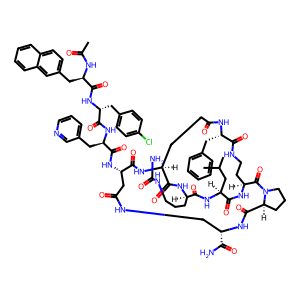

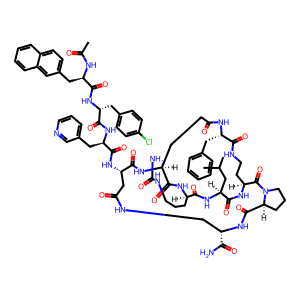

In [73]:
# helm = "PEPTIDE1{[dC].[dD].G.[Hpr].G.[Hyp].N.[dC].[am]}$PEPTIDE1,PEPTIDE1,8:R3-1:R3$$$"
# smiles = "NC(=O)C[C@@H]1NC(=O)[C@@H]2C[C@@H](O)CN2C(=O)CNC(=O)[C@@H]2CCCCN2C(=O)CNC(=O)[C@@H](CC(=O)O)NC(=O)[C@H](N)CSSC[C@H](C(N)=O)NC1=O"

# helm = "PEPTIDE1{[X1670].[Abu].[Sar].[meL].V.[meL].A.[dS].[meL].[meL].[meV]}$PEPTIDE1,PEPTIDE1,11:R2-1:R1$$$"
# smiles = "C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@H](CO)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](C(C)C)C(=O)N1C"

# helm = "PEPTIDE1{[Hpr].[Me_dF].P.[dW].[dalloI].[dHpr]}$PEPTIDE1,PEPTIDE1,6:R2-1:R1$$$"
# smiles = "CC[C@H](C)[C@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)[C@@H]2CCCN2C(=O)[C@@H](Cc2ccccc2)N(C)C(=O)[C@@H]2CCCCN2C(=O)[C@H]2CCCCN2C1=O"

helm = "PEPTIDE1{F}|PEPTIDE2{[Dab]}|PEPTIDE3{[ac].[dNal].[dPhe(4-Cl)].[d3-Pal].D.E.[dCit].L}|PEPTIDE4{P.[Dpr].[am]}$PEPTIDE2,PEPTIDE4,1:R2-1:R1|PEPTIDE4,PEPTIDE3,2:R3-5:R3|PEPTIDE3,PEPTIDE1,6:R3-1:R1|PEPTIDE2,PEPTIDE1,1:R3-1:R2|PEPTIDE3,PEPTIDE2,8:R2-1:R1$$$"
smiles = "CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1ccc(Cl)cc1)C(=O)N[C@H](Cc1cccnc1)C(=O)N[C@H]1CC(=O)NC[C@@H](C(N)=O)NC(=O)[C@@H]2CCCN2C(=O)[C@@H]2CCNC(=O)[C@H](Cc3ccccc3)NC(=O)CC[C@H](NC1=O)C(=O)N[C@H](CCCNC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N2"

mol_helm = converter.convert(helm)
mol_helm = Chem.RemoveHs(mol_helm)
mol_smiles = Chem.MolFromSmiles(smiles)

width = 300
height = 300

print(is_same_mol(mol_helm, mol_smiles, ))
print(Chem.MolToSmiles(mol_helm) + " ...helm -> smiles")
print(Chem.MolToSmiles(mol_smiles) + " ...smiles -> smiles")
print(smiles + " ...raw")

draw_mol(mol_helm, width, height)
draw_mol(mol_smiles, width, height)

*C(=O)[C@H]([C@H](O)[C@H](C)CC=CC)N(*)C


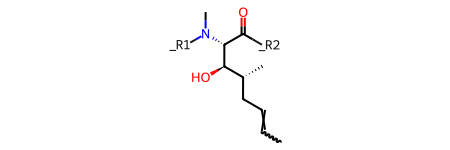

In [ ]:
helm = "PEPTIDE1{[X1670]}$$$$" # n=139, removed w:1.0 and added /
# helm = "PEPTIDE1{[dHpr]}$$$$" # n=131, f
# helm = "PEPTIDE1{[Hpr]}$$$$" #n=91, f
# helm = "PEPTIDE1{[X1669]}$$$$" # n=2
# helm = "PEPTIDE1{[X1590]}$$$$" # n=1
mol = converter._convert(helm, close=False)
print(Chem.MolToSmiles(mol))
mol

In [ ]:
mol = Chem.MolFromSmiles("C/C=C/C[C@@H](C)[C@@H](O)[C@H](N(C)[*])C([*])=O |w:1.0,$;;;;;;;;;;;_R1;;_R2;$|")
print(Chem.MolToSmiles(mol))

*C(=O)[C@H]([C@H](O)[C@H](C)C/C=C/C)N(*)C
